In [2]:
import os, sys
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [3]:
# Clustering on data 
df = pd.read_csv("Processed_data.csv")

In [4]:
df['Outlet_Size'] = df['Outlet_Size'].apply(lambda x : round(x,0))


In [5]:
data = df.copy()

In [6]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

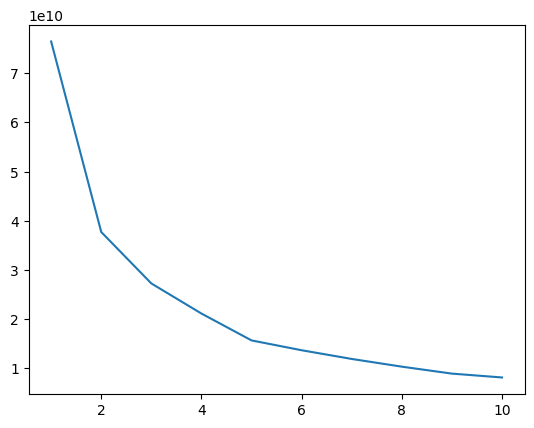

In [7]:
plt.plot(range(1,11),wcss)

In [8]:
kn = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [9]:
Total_cluster = kn.knee


In [10]:
kmean = KMeans(n_clusters=Total_cluster,random_state=42)
cluster = kmean.fit_predict(data)
data['cluster'] = cluster

In [11]:
data['cluster'].unique()

array([1, 2, 0])

In [12]:
data.drop(['Unnamed: 0'],axis=1,inplace = True)

In [13]:
data['Item_Outlet_Sales']
# X = data.drop(['Item_Outlet_Sales','cluster'],axis=1)
X_with_cluster = data.drop(['Item_Outlet_Sales'],axis=1)
y = data['Item_Outlet_Sales']

In [14]:
X_with_cluster.head()

,Item_Weight,Item_Visibility,Item_MRP,Age_Outlet,Item_Identifier,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,cluster
0,-0.808326,-1.111358,1.747454,-0.139541,1.0,0.0,1.0,0.0,1.0,1
1,-1.581672,-1.045067,-1.489023,-1.334103,0.0,2.0,1.0,2.0,2.0,1
2,1.067837,-1.096733,0.010040,-0.139541,1.0,0.0,1.0,0.0,1.0,1
3,1.456798,-0.083740,0.660050,-0.020085,1.0,2.0,2.0,2.0,0.0,1
4,-0.892983,-0.083740,-1.399220,1.293934,2.0,1.0,0.0,2.0,1.0,1


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

NameError: name 'X' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_with_cluster, y, test_size=0.20, random_state=42)

In [ ]:
# X_without Cluster 
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train)
y_pred = linear.predict(X_test)

from sklearn.metrics import r2_score
r = r2_score(y_test,y_pred)
r

In [ ]:
# X_with Cluster 
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train)
y_pred = linear.predict(X_test)

from sklearn.metrics import r2_score
r = r2_score(y_test,y_pred)
r

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

r = r2_score(y_test,y_pred)
r

In [ ]:
# X_with Cluster 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

r = r2_score(y_test,y_pred)
r

In [ ]:
from sklearn.model_selection import cross_val_score
scoresrf = cross_val_score(RandomForestRegressor(),X,y,cv=5)

In [ ]:
scoresrf

In [ ]:
for i in scoresrf:
    print(round(i,2))
print(f'Average score {round(scoresrf.mean(),2)}')

In [ ]:
scoreslr = cross_val_score(LinearRegression(),X,y,cv=5)

In [ ]:
for i in scoreslr:
    print(round(i,2))
print(f'Average score {round(scoreslr.mean(),2)}')

In [ ]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)

r = r2_score(y_test,y_pred)
r

In [ ]:
a = [i/100 for i in range(1,10)]
a

In [ ]:
best_params = {'alpha': 0.1,
 'colsample_bytree': 0.82,
 'eta': 0.01,
 'gamma': 0.1,
 'max_depth': 4,
 'n_estimators': 65,
 'subsample': 0.9}


eta=best_params['eta']
max_depth=best_params['max_depth']
gamma=best_params['gamma']
subsample=best_params['subsample']
colsample_bytree=best_params['colsample_bytree']
alpha=best_params['eta']
n_estimators=best_params['n_estimators']

model=XGBRegressor(objective='reg:squarederror', eta=eta, max_depth=max_depth,  gamma=gamma, subsample=subsample, colsample_bytree=colsample_bytree, alpha=alpha, n_estimators=n_estimators)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

r2=r2_score(y_test, y_pred)
r2

In [ ]:
pramrf = {'n_estimators':range(10,100,5),
        'criterion':["squared_error", "absolute_error"],
       'max_depth':range(3,10,1),
        'max_features':[i/100.0 for i in range(70,100,3)],
        'max_samples':[i/100.0 for i in range(70,100,5)]
       }

pramxg = {'eta' : [i/100 for i in range(1,10)],
          'max_depth' : range(3,10,1),
          'gamma' : [i/10 for i in range(1,10)],
          'subsample':[i/100.0 for i in range(70,100,5)],
          'colsample_bytree':[i/100.0 for i in range(70,100,3)],
          'alpha' : np.arange(0.1, 10, 0.1),
          'n_estimators':range(10,100,5)
          }

In [ ]:
gridxg  = GridSearchCV(XGBRegressor(objective='reg:squarederror'), paramxg, cv=5, n_jobs=-1)
gridxg.fit(X_train,y_train)
gridxg.best_params_

In [ ]:
gridrf  = GridSearchCV(RandomForestRegressor(), paramrf, cv=5, n_jobs=-1)
gridrf.fit(X_train,y_train)
gridrf.best_params_

In [ ]:
best_paramsRF = {'criterion': 'absolute_error',
 'max_depth': 7,
 'max_features': 0.79,
 'max_samples': 0.7,
 'n_estimators': 75}

best_paramsXG = {'alpha': 0.1,
 'colsample_bytree': 0.82,
 'eta': 0.01,
 'gamma': 0.1,
 'max_depth': 4,
 'n_estimators': 65,
 'subsample': 0.9}

In [ ]:
eta=best_paramsXG['eta']
max_depth=best_paramsXG['max_depth']
gamma=best_paramsXG['gamma']
subsample=best_paramsXG['subsample']
colsample_bytree=best_paramsXG['colsample_bytree']
alpha=best_paramsXG['eta']
n_estimators=best_paramsXG['n_estimators']

model=XGBRegressor(objective='reg:squarederror', eta=eta, max_depth=max_depth,  gamma=gamma, subsample=subsample, colsample_bytree=colsample_bytree, alpha=alpha, n_estimators=n_estimators,booster="gblinear")
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

r2=r2_score(y_test, y_pred)
r2

print(f'r2 score : {r2}')
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("RMSE: %.2f" % (mse**(1/2.0)))

In [ ]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)

r = r2_score(y_test,y_pred)
print(f'r2 score : {r}')
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("RMSE: %.2f" % (mse**(1/2.0)))

In [ ]:
criterion=best_paramsRF['criterion']
max_depth=best_paramsRF['max_depth']
max_features=best_paramsRF['max_features']
max_samples=best_paramsRF['max_samples']
n_estimators=best_paramsRF['n_estimators']



best_paramsRF = {'criterion': 'absolute_error',
 'max_depth': 7,
 'max_features': 0.79,
 'max_samples': 0.7,
 'n_estimators': 75}


model=RandomForestRegressor(criterion=criterion, max_depth = max_depth, max_features = max_features, max_samples = max_samples, n_estimators = n_estimators)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_test, y_pred)
r2

print(f'r2 score : {r2}')
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("RMSE: %.2f" % (mse**(1/2.0)))

In [ ]:
X_train

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

r = r2_score(y_test,y_pred)
r

print(f'r2 score : {r}')
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("RMSE: %.2f" % (mse**(1/2.0)))

In [ ]:
a = [i/10 for i in range(1,5)]
a

In [ ]:
from sklearn.model_selection import GridSearchCV
params1 = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}



xgbr = XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train,y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

In [ ]:
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01,
                  'max_depth': 6, 'n_estimators': 500}

model=XGBRegressor(objective='reg:squarederror',  max_depth=6, colsample_bytree=0.7, n_estimators=500,learning_rate=0.01)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

r2=r2_score(y_test, y_pred)
r2

print(f'r2 score : {r2}')
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("RMSE: %.2f" % (mse**(1/2.0)))|

In [ ]:
# X_with Cluster 
from xgboost import XGBRegressor

model=XGBRegressor(objective='reg:squarederror',  max_depth=6, colsample_bytree=0.7, n_estimators=500,learning_rate=0.01)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

r2=r2_score(y_test, y_pred)
r2

print(f'r2 score : {r2}')
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("RMSE: %.2f" % (mse**(1/2.0)))

In [ ]:
import numpy as np
def load_numpy_array_data(file_path: str) -> np.array:
    with open(file_path, 'rb') as file_obj:
            return np.load(file_obj)